In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from IPython.display import display
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import cv2
import random
import os
%matplotlib inline

In [2]:
print(os.listdir("./"))

['.ipynb_checkpoints', '._test_photos', '._train_photos', '._train_photo_to_biz_ids.csv', 'classifier.py', 'cnn_vgg_new.ipynb', 'Code_v1.2.ipynb', 'final', 'final_test_data.csv', 'final_train_data.csv', 'final_validation_data.csv', 'MP3_P1.ipynb', 'MP3_P1_new.ipynb', 'naive-benchmark-0-61.ipynb', 'outfile_test.npy', 'outfile_test_large.npy', 'outfile_train.npy', 'outfile_train_large.npy', 'Payslip-01.pdf', 'preprocessing.py', 'preprocessing_full_vgg_cnn.py', 'preprocessing_new.py', 'Project - Copy.ipynb', 'Project Report.docx', 'Project.ipynb', 'sample_submission.csv', 'test', 'test_final_subset_afteripca.csv', 'test_incremental_sum.npy', 'test_photos', 'test_photos.tgz', 'test_photos_new', 'test_photo_to_biz.csv', 'train', 'train.csv', 'train_final_subset_afteripca.csv', 'train_incremental_sum.npy', 'train_photos', 'train_photos.tgz', 'train_photos_new', 'train_photos_new.zip', 'train_photos_new_sample.zip', 'train_photo_to_biz_ids.csv', 'Untitled.ipynb', 'Untitled1_full_vgg_cnn.ipynb

In [3]:
# The first step would be to load the training data csv file that maps business ID to labels
train = pd.read_csv('./train.csv')
display(train.head())
print('Shape of train data csv:', train.shape)
print('Number of unique business IDs:', train.shape[0])

,business_id,labels
0,1000,1 2 3 4 5 6 7
1,1001,0 1 6 8
2,100,1 2 4 5 6 7
3,1006,1 2 4 5 6
4,1010,0 6 8


Shape of train data csv: (2000, 2)
Number of unique business IDs: 2000


In [4]:
train_dir = './train_photos'
train_imgs = os.listdir(train_dir)

test_dir = './test_photos'
test_imgs = os.listdir(test_dir)

print('Number of training images:', len(train_imgs))
print('Number of testing images:', len(test_imgs))

Number of training images: 234842
Number of testing images: 237152


In [5]:
# Load training data that maps photos to business ID
train_photo_to_id = pd.read_csv('./train_photo_to_biz_ids.csv')
display(train_photo_to_id.head())
print('Shape of train_photo_to_id:', train_photo_to_id.shape)
print('Number of images in training set:', train_photo_to_id.shape[0])

,photo_id,business_id
0,204149,3034
1,52779,2805
2,278973,485
3,195284,485
4,19992,485


Shape of train_photo_to_id: (234842, 2)
Number of images in training set: 234842


In [6]:
# Business id to labels dataframe
print('Total number of missing labels:', train['labels'].isnull().sum())
display(train[train['labels'].isnull()])

Total number of missing labels: 4


,business_id,labels
385,1627,NaN
928,2661,NaN
1083,2941,NaN
1678,430,NaN


In [21]:
random.sample(train_imgs, 8)

['322470.jpg',
 '120207.jpg',
 '377184.jpg',
 '337986.jpg',
 '130396.jpg',
 '85752.jpg',
 '71441.jpg',
 '368738.jpg']

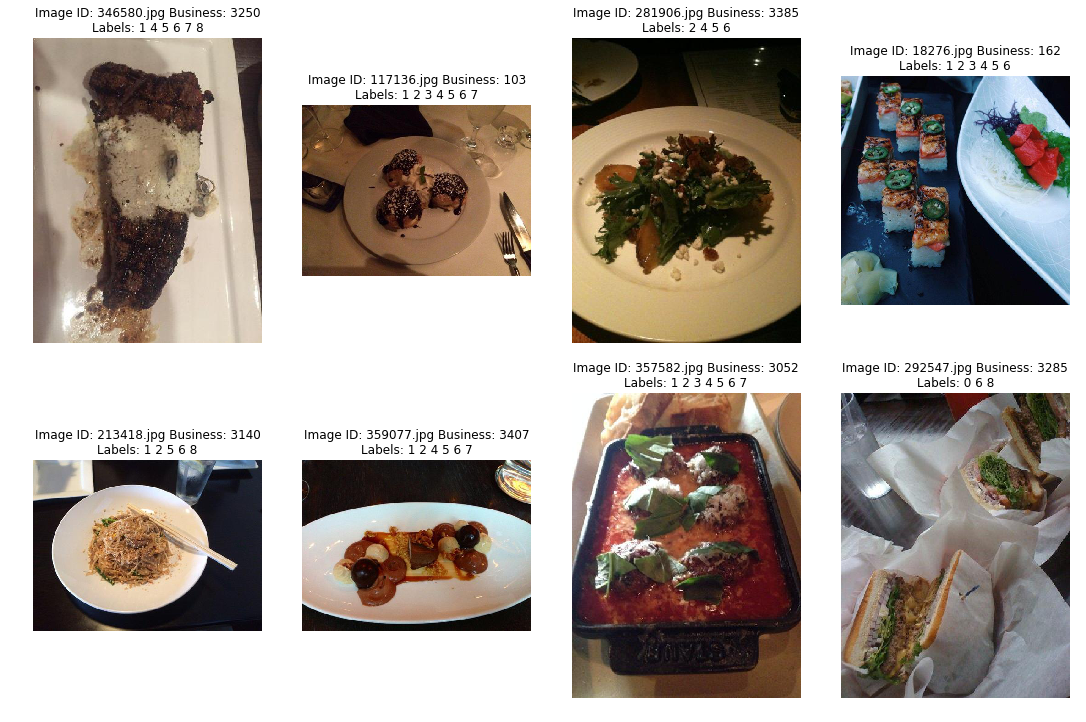

In [7]:
# Randomly sample 8 images
imgs_samples = random.sample(train_imgs, 8)

# Plot random sample of 8 images
plt.figure(figsize=(15, 10))
for i in range(len(imgs_samples)):
    # OpenCV2 reads images in BGR format
    img = cv2.imread(os.path.join(train_dir, imgs_samples[i]))
    # Switch color channels to RGB to make compatible with matplotlib imshow func
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Grab image's business ID and labels
    business = train_photo_to_id.loc[train_photo_to_id['photo_id'] == int(imgs_samples[i][:-4]), 'business_id']
    labels = train.loc[train['business_id'] == business.values[0], 'labels']
    # Annotate each image with image ID, business ID, and labels
    title = "Image ID: " + imgs_samples[i] + ' Business: ' + str(business.values[0]) + '\nLabels: ' + ''.join(labels.values)
    # Plot the image
    plt.subplot(2, 4, i+1)
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    plt.imshow(img)
    plt.axis('off')
    plt.title(title)
plt.show()


In [38]:
# Count all labels in training set
all_labels = ' '.join(list(train['labels'].fillna('nan').values)).split()
from collections import Counter
label_counts = Counter(all_labels)
for key in label_counts:
    print('Label {0} appears {1} times in training dataset'.format(key, label_counts[key]))
label_counts

Label 1 appears 993 times in training dataset
Label 2 appears 1026 times in training dataset
Label 3 appears 1003 times in training dataset
Label 4 appears 547 times in training dataset
Label 5 appears 1249 times in training dataset
Label 6 appears 1360 times in training dataset
Label 7 appears 572 times in training dataset
Label 0 appears 671 times in training dataset
Label 8 appears 1238 times in training dataset
Label nan appears 4 times in training dataset


Counter({'0': 671,
         '1': 993,
         '2': 1026,
         '3': 1003,
         '4': 547,
         '5': 1249,
         '6': 1360,
         '7': 572,
         '8': 1238,
         'nan': 4})

In [55]:
final_train_data.groupby('label_8').size()

label_8
0    13744
1    12726
dtype: int64

In [10]:
#Train data
#Creating one hot encoding for different labels
train = pd.read_csv('./train.csv')
def to_bool(s):
    return(pd.Series([1 if str(i) in str(s).split(' ') else 0 for i in range(9)]))
Y = train['labels'].apply(to_bool)
train_new = pd.concat([train, Y], axis=1)
train_new['labels_new'] = train_new[[0,1,2,3,4,5,6,7,8]].values.tolist()
train_new = train_new[['business_id', 'labels_new']]

#Merge with the train photos to map the photos with the labels
train_photo_labels = pd.merge(train_new, train_photo_to_id, on='business_id', how='inner')
train_photo_labels = train_photo_labels.sort_values(by=['photo_id'])

In [11]:
#Test data
#Creating one hot encoding for different labels
train = pd.read_csv('./train.csv')
def to_bool(s):
    return(pd.Series([1 if str(i) in str(s).split(' ') else 0 for i in range(9)]))
Y = train['labels'].apply(to_bool)
train_new = pd.concat([train, Y], axis=1)
train_new['labels_new'] = train_new[[0,1,2,3,4,5,6,7,8]].values.tolist()
train_new = train_new[['business_id', 'labels_new']]

#Merge with the train photos to map the photos with the labels
photo_labels = pd.merge(train_new, train_photo_to_id, on='business_id', how='inner')
photo_labels = train_photo_labels.sort_values(by=['photo_id'])

In [26]:
#let us get a fraction of business id's to use in our project
a = train['business_id'].tolist()
random.seed(1)
random.shuffle(a)
#this will be our train business_ids and test business_ids
train_business_ids = a[:200]
test_business_ids = a[200:300]
validation_business_ids = a[300:400]
#We will subset fo ovrall train and test data
train_photo_labels = photo_labels[photo_labels.business_id.isin(train_business_ids)].dropna()
test_photo_labels = photo_labels[photo_labels.business_id.isin(test_business_ids)].dropna()
validation_photo_labels = photo_labels[photo_labels.business_id.isin(validation_business_ids)].dropna()

In [28]:
train_photo_labels.reset_index(drop=True, inplace=True)
test_photo_labels.reset_index(drop=True, inplace=True)
validation_photo_labels.reset_index(drop=True, inplace=True)

#Creating final train  and test data
df2 = pd.DataFrame(train_photo_labels.labels_new.tolist(), columns=['label_0', 'label_1', 'label_2', 'label_3','label_4', 'label_5',
                                                         'label_6', 'label_7', 'label_8'])
df2.reset_index(drop=True, inplace=True)
final_train_data = pd.concat([train_photo_labels, df2], axis=1)
df3 = pd.DataFrame(test_photo_labels.labels_new.tolist(), columns=['label_0', 'label_1', 'label_2', 'label_3','label_4', 'label_5',
                                                         'label_6', 'label_7', 'label_8'])
df3.reset_index(drop=True, inplace=True)
final_test_data = pd.concat([test_photo_labels, df3], axis=1)

df4 = pd.DataFrame(validation_photo_labels.labels_new.tolist(), columns=['label_0', 'label_1', 'label_2', 'label_3','label_4', 'label_5',
                                                         'label_6', 'label_7', 'label_8'])
df4.reset_index(drop=True, inplace=True)
final_validation_data = pd.concat([validation_photo_labels, df4], axis=1)


In [154]:
#Exporting the final train and test data to csv files
final_train_data.to_csv('./final_train_data.csv') 
final_test_data.to_csv('./final_test_data.csv') 
final_validation_data.to_csv('./final_validation_data.csv') 

In [153]:
#Adding .jpg to the end of the photo_id column so that we can transfer th images to a new folder
final_train_data['photo_id'] = final_train_data['photo_id'].astype(str)
final_train_data.photo_id = final_train_data.photo_id + '.jpg'

final_test_data['photo_id'] = final_test_data['photo_id'].astype(str)
final_test_data.photo_id = final_test_data.photo_id + '.jpg'

final_validation_data['photo_id'] = final_validation_data['photo_id'].astype(str)
final_validation_data.photo_id = final_validation_data.photo_id + '.jpg'

In [160]:
#Exporting the selected images to a new folder
import shutil
for i in range(0, len(final_train_data['photo_id'])):
    srcpath = os.path.join('./train_photos', final_train_data['photo_id'].values[i])
    dstpath = os.path.join('./train_photos_new', final_train_data['photo_id'].values[i])
    shutil.copyfile(srcpath, dstpath)

for i in range(0, len(final_test_data['photo_id'])):
    srcpath = os.path.join('./train_photos', final_test_data['photo_id'].values[i])
    dstpath = os.path.join('./test_photos_new', final_test_data['photo_id'].values[i])
    shutil.copyfile(srcpath, dstpath)

In [161]:
import shutil
for i in range(0, len(final_validation_data['photo_id'])):
    srcpath = os.path.join('./train_photos', final_validation_data['photo_id'].values[i])
    dstpath = os.path.join('./validation_photos_new', final_validation_data['photo_id'].values[i])
    shutil.copyfile(srcpath, dstpath)

In [71]:
####################Train main to extract the pca components################################
import numpy as np
from skimage import io, transform
import glob

from sklearn.decomposition import IncrementalPCA
ipca = IncrementalPCA(n_components=600)
a = [0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000, 20000, 22000,24000]
for i in range(len(a)-1):
    j = 0
    b = final_train_data.iloc[a[i]:a[i+1]]
    print(a[i], a[i+1])
    photo_list = b.photo_id.tolist()
    feature_matrix = np.empty((0,3*224*224), int)
   
    for i in photo_list:
            img = io.imread('./train_photos_new/{}'.format(i))
            img1 = transform.resize(img, (224, 224), mode='reflect', preserve_range = bool)
            nparray_im = np.array(img1).reshape(1,-1)
            feature_matrix = np.append(feature_matrix, nparray_im, axis=0)
    ipca.partial_fit(feature_matrix)
    j += 1
    print(j)
            

0 2000
1
2000 4000
1
4000 6000
1
6000 8000
1
8000 10000
1
10000 12000
1
12000 14000
1
14000 16000
1
16000 18000
1
18000 20000
1
20000 22000
1
22000 24000
1


In [77]:
####################Train main to extract the pca components################################
a = [0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000, 20000, 22000,24000]
train_final = np.empty((24000,600), int)
for i in range(len(a)-1):
    j = 0
    b = final_train_data.iloc[a[i]:a[i+1]]
    print(a[i], a[i+1])
    photo_list = b.photo_id.tolist()
    feature_matrix = np.empty((0,3*224*224), int)
   
    for i in photo_list:
            img = io.imread('./train_photos_new/{}'.format(i))
            img1 = transform.resize(img, (224, 224), mode='reflect', preserve_range = bool)
            nparray_im = np.array(img1).reshape(1,-1)
            feature_matrix = np.append(feature_matrix, nparray_im, axis=0)
    new_train = ipca.transform(feature_matrix)
    train_final = np.append(train_final, new_train, axis=0)

0 2000
2000 4000
4000 6000
6000 8000
8000 10000
10000 12000
12000 14000
14000 16000
16000 18000
18000 20000
20000 22000
22000 24000


In [96]:
train_final_subset = train_final[24000:,]

In [98]:
train_final_subset.shape

(24000, 600)

In [106]:
#saving it as a npy file
from tempfile import TemporaryFile
outfile_train = TemporaryFile()
outfile_train_large = TemporaryFile()
np.save('C:/Users/Sreekanth/Desktop/CS498/Project/working folder/outfile_train.npy', train_final_subset)
np.save('C:/Users/Sreekanth/Desktop/CS498/Project/working folder/outfile_train_large.npy', train_final)

In [102]:
#converting to csv
df = pd.DataFrame(train_final_subset)
df.to_csv('./train_final_subset_afteripca.csv') 

In [117]:
train_incremental_cumsum = ipca.explained_variance_ratio_

In [118]:
train_incremental_cumsum

array([  2.24213084e-01,   9.14692504e-02,   5.56807076e-02,
         3.18606091e-02,   2.76291271e-02,   2.42170986e-02,
         2.23356440e-02,   2.06257367e-02,   1.69959590e-02,
         1.21812404e-02,   1.17561587e-02,   1.07964591e-02,
         9.85671925e-03,   8.80040304e-03,   8.69468982e-03,
         7.69010519e-03,   7.56348958e-03,   6.21875107e-03,
         5.93570643e-03,   5.64349304e-03,   5.50064616e-03,
         5.10871819e-03,   4.91642788e-03,   4.61548845e-03,
         4.41183437e-03,   4.18495530e-03,   4.15337576e-03,
         4.08827455e-03,   3.84660351e-03,   3.78916488e-03,
         3.70187376e-03,   3.28668231e-03,   3.25372472e-03,
         3.13503537e-03,   3.07987441e-03,   2.94907813e-03,
         2.91585013e-03,   2.69587565e-03,   2.64312681e-03,
         2.59615382e-03,   2.41454284e-03,   2.38422218e-03,
         2.35075367e-03,   2.24293817e-03,   2.20463586e-03,
         2.11443152e-03,   2.02546772e-03,   2.01409977e-03,
         1.98290312e-03,

In [120]:
from tempfile import TemporaryFile
train_incremental_sum = TemporaryFile()
np.save('C:/Users/Sreekanth/Desktop/CS498/Project/working folder/train_incremental_sum.npy', train_incremental_cumsum)

In [121]:
####################test main to extract the pca components################################
import numpy as np
from skimage import io, transform
import glob

from sklearn.decomposition import IncrementalPCA
ipca = IncrementalPCA(n_components=600)
a = [0, 2000, 4000, 6000, 8000, 10000, 12000]
for i in range(len(a)-1):
    j = 0
    b = final_test_data.iloc[a[i]:a[i+1]]
    print(a[i], a[i+1])
    photo_list = b.photo_id.tolist()
    feature_matrix = np.empty((0,3*224*224), int)
   
    for i in photo_list:
            img = io.imread('./test_photos_new/{}'.format(i))
            img1 = transform.resize(img, (224, 224), mode='reflect', preserve_range = bool)
            nparray_im = np.array(img1).reshape(1,-1)
            feature_matrix = np.append(feature_matrix, nparray_im, axis=0)
    ipca.partial_fit(feature_matrix)
    j += 1
    print(j)
            

0 2000
1
2000 4000
1
4000 6000
1
6000 8000
1
8000 10000
1
10000 12000
1


In [122]:
####################Test main to extract the pca components################################
a = [0, 2000, 4000, 6000, 8000, 10000, 12000]
test_final = np.empty((24000,600), int)
for i in range(len(a)-1):
    j = 0
    b = final_test_data.iloc[a[i]:a[i+1]]
    print(a[i], a[i+1])
    photo_list = b.photo_id.tolist()
    feature_matrix = np.empty((0,3*224*224), int)
   
    for i in photo_list:
            img = io.imread('./test_photos_new/{}'.format(i))
            img1 = transform.resize(img, (224, 224), mode='reflect', preserve_range = bool)
            nparray_im = np.array(img1).reshape(1,-1)
            feature_matrix = np.append(feature_matrix, nparray_im, axis=0)
    new_test = ipca.transform(feature_matrix)
    test_final = np.append(test_final, new_test, axis=0)

0 2000
2000 4000
4000 6000
6000 8000
8000 10000
10000 12000


In [140]:
test_final_subset = test_final[24000:,]

In [141]:
test_final_subset.shape

(12000, 600)

In [142]:
#saving it as a npy file
from tempfile import TemporaryFile
outfile_test = TemporaryFile()
outfile_test_large = TemporaryFile()
np.save('C:/Users/Sreekanth/Desktop/CS498/Project/working folder/outfile_test.npy', test_final_subset)
np.save('C:/Users/Sreekanth/Desktop/CS498/Project/working folder/outfile_test_large.npy', test_final)

In [143]:
#converting to csv
df = pd.DataFrame(test_final_subset)
df.to_csv('./test_final_subset_afteripca.csv') 

In [144]:
test_incremental_cumsum = ipca.explained_variance_ratio_

In [146]:
print(ipca.explained_variance_ratio_.cumsum())

[ 0.22389637  0.30753595  0.36154144  0.39445772  0.42281087  0.44791007
  0.47020221  0.49038345  0.50674664  0.51858525  0.53036856  0.54129568
  0.55099433  0.55977608  0.56836428  0.5760357   0.58358853  0.58986961
  0.59592393  0.60156565  0.60708352  0.61254173  0.61772388  0.62259444
  0.62723332  0.63178174  0.6359625   0.6400495   0.64394936  0.64782952
  0.65159732  0.65509794  0.65836366  0.66147575  0.66456403  0.66755038
  0.67038103  0.67312528  0.67579497  0.67844294  0.68091471  0.68332983
  0.68570883  0.68801587  0.69027679  0.69250574  0.69467379  0.69679554
  0.69887165  0.70088952  0.7028868   0.70481443  0.70669267  0.70850819
  0.71026667  0.71201913  0.71371278  0.71539538  0.71703537  0.71866335
  0.72026293  0.72181894  0.72336066  0.72486744  0.72632642  0.72777533
  0.72919427  0.73059555  0.73197083  0.73333553  0.73463867  0.73592823
  0.73718408  0.73842849  0.73966119  0.74085974  0.74202625  0.74318473
  0.74433099  0.74545205  0.74655096  0.74760862  0

In [147]:
from tempfile import TemporaryFile
test_incremental_sum = TemporaryFile()
np.save('C:/Users/Sreekanth/Desktop/CS498/Project/working folder/test_incremental_sum.npy', test_incremental_cumsum)

In [168]:
#Creating final train data
Ytrain = final_train_data.iloc[0:24000,[3,4,5,6,7,8,9,10,11]]
Xtrain = pd.DataFrame(train_final_subset)

In [173]:
#Creatng final test data
Ytest = final_test_data.iloc[0:12000,[3,4,5,6,7,8,9,10,11]]
Xtest = pd.DataFrame(test_final_subset)

In [174]:
print(Ytest.shape)
print(Xtest.shape)

(12000, 9)
(12000, 600)


In [29]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score
from sklearn.externals import joblib



# Use validation data for calculating the training accuracy, random_state ensures reproducible results without overfitting
#trainX, validationX, trainY, validationY = train_test_split(trainX, trainY, test_size=0.3, random_state=42)



# Create an SVM classifier from sklearn package
clf = OneVsRestClassifier(SVC(kernel='linear', probability=True, verbose=True))

# Fit the classifier on the training data and labels
clf.fit(business_xtrain, business_ytrain)




# Predict the labels for the validation data
svm_preds_binary = clf.predict(business_xtest)

# Predicted labels are converted back
# (1, 0, 1, 0, 1, 0, 0, 0, 1) -> (1, 3, 5, 9)
#predicted_labels = mlb.inverse_transform(svm_preds_binary)

print("Validation Set Results:")
print(f1_score(svm_preds_binary, business_ytest, average='micro'))
print(f1_score(svm_preds_binary, business_ytest, average=None))

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Validation Set Results:
0.573932092004
[ 0.36666667  0.52631579  0.62809917  0.44680851  0.29508197  0.6875
  0.79754601  0.17857143  0.67241379]


In [2]:
import numpy as np
train_final_subset = np.load('C:/Users/Sreekanth/Desktop/CS498/Project/working folder/outfile_train.npy')
test_final_subset = np.load('C:/Users/Sreekanth/Desktop/CS498/Project/working folder/outfile_test.npy')

In [5]:
#Trying out by averaging the image features
train_final_subset_dataframe = pd.DataFrame(train_final_subset)
test_final_subset_dataframe = pd.DataFrame(test_final_subset)

In [24]:
business_train = pd.concat([final_train_data.iloc[0:24000,0], train_final_subset_dataframe], axis=1)
business_test = pd.concat([final_test_data.iloc[0:12000,0], test_final_subset_dataframe], axis=1)

In [25]:
business_xtrain = business_train.groupby(['business_id']).mean()
business_xtest = business_test.groupby(['business_id']).mean()

In [26]:
business_ytrain = final_train_data.drop_duplicates(['business_id','label_0', 'label_1', 'label_2', 'label_3','label_4',
                                                    'label_5','label_6', 'label_7', 'label_8'])
business_ytrain = business_ytrain.iloc[:,[0,3,4,5,6,7,8,9,10,11]].sort_values('business_id')
business_ytrain = business_ytrain.iloc[:,[1,2,3,4,5,6,7,8,9]]

In [27]:
business_ytest = final_test_data.drop_duplicates(['business_id','label_0', 'label_1', 'label_2', 'label_3','label_4',
                                                    'label_5','label_6', 'label_7', 'label_8'])
business_ytest = business_ytest.iloc[:,[0,3,4,5,6,7,8,9,10,11]].sort_values('business_id')
business_ytest = business_ytest.iloc[:,[1,2,3,4,5,6,7,8,9]]

In [133]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score
from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression

cls1 = OneVsRestClassifier(LogisticRegression())
cls1.fit(business_xtrain, business_ytrain)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=1)

In [134]:

# Predict the labels for the validation data
logistic_preds_binary = cls1.predict(business_xtest)

# Predicted labels are converted back
# (1, 0, 1, 0, 1, 0, 0, 0, 1) -> (1, 3, 5, 9)
#predicted_labels = mlb.inverse_transform(svm_preds_binary)

print("Validation Set Results:")
print(f1_score(logistic_preds_binary, business_ytest, average='micro'))
print(f1_score(logistic_preds_binary, business_ytest, average=None))

Validation Set Results:
0.530612244898
[ 0.4         0.50943396  0.55855856  0.47311828  0.4         0.62264151
  0.64566929  0.38356164  0.63063063]
